# Create annotation visualization from one video

In [1]:
from ai_badminton.pose import read_player_poses
from ai_badminton.court import read_court, court_points_to_corners, Court
from ai_badminton.trajectory import Trajectory
from ai_badminton.video_annotator import annotate_video
from ai_badminton.hit_detector import read_hits

import cv2

import numpy as np
from pathlib import Path

## Read different data

In [6]:
dataset_root = "/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset"
prefix_template = dataset_root + "/match1/%s/1_01_00"

poses = read_player_poses(prefix_template %("poses"))

court_pts = read_court((prefix_template %("court")) + ".out")
court = Court(corners = court_points_to_corners(court_pts))

trajectory = Trajectory((prefix_template %("ball_trajectory")) + "_ball.csv")

hits_path = Path((prefix_template %("shot")) + "_hit_predict.csv")
result, is_hit = read_hits(hits_path)

video_file = (prefix_template %("rally_video")) + ".mp4"
cap = cv2.VideoCapture(video_file)
assert cap.isOpened(), f"Cannot open video {video_file}"

In [8]:
annotate_video(cap, court, poses, trajectory, result=result, is_hit=is_hit, outfile="./test.mp4")

  0%|          | 0/651 [00:00<?, ?it/s]

# Create annotation visualization from all video with 3d trajectory

In [15]:
from ai_badminton.pose import read_player_poses
from ai_badminton.court import read_court, court_points_to_corners, Court
from ai_badminton.trajectory import Trajectory, read_trajectory_3d
from ai_badminton.video_annotator import annotate_video_3d
from ai_badminton.hit_detector import read_hits
from ai_badminton.pipeline_clean import read_poses_court_trajectory

import cv2

import numpy as np
from pathlib import Path

for match_idx in range(1, 23):
    match_path = Path(f"/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match{match_idx}")

    rally_videos = (match_path / "rally_video").glob("*.mp4")
    video_names = [p.stem for p in rally_videos]

    for video_name in video_names:

        video_path = match_path / "rally_video" / (video_name + ".mp4")

        cap = cv2.VideoCapture(str(video_path))
        assert cap.isOpened()

        trajectory_3d_path = match_path / "ball_trajectory_3d" / (video_path.stem + "_3d.csv")
        print(trajectory_3d_path)
        assert trajectory_3d_path.is_file()

        metadata = read_poses_court_trajectory(match_path, video_path.stem)
        output_path = match_path / "annotated_3d" / (video_path.stem + "_3d.mp4")
        output_path.parent.mkdir(parents=True, exist_ok=True)
        annotate_video_3d(
            cap,
            metadata["court3d"],
            read_trajectory_3d(trajectory_3d_path),
            outfile = str(output_path)
        )
        print("Done")


/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match1/ball_trajectory_3d/1_03_04_3d.csv
137


  0%|          | 0/137 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match1/ball_trajectory_3d/1_06_06_3d.csv
155


  0%|          | 0/155 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match1/ball_trajectory_3d/1_06_08_3d.csv
98


  0%|          | 0/98 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match1/ball_trajectory_3d/1_02_00_3d.csv
497


  0%|          | 0/497 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match1/ball_trajectory_3d/1_03_05_3d.csv
356


  0%|          | 0/356 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match1/ball_trajectory_3d/1_02_01_3d.csv
194


  0%|          | 0/194 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match1/ball_trajectory_3d/1_06_09_3d.csv
452


  0%|          | 0/452 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match1/ball_trajectory_3d/1_02_02_3d.csv
257


  0%|          | 0/257 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match1/ball_trajectory_3d/1_03_06_3d.csv
248


  0%|          | 0/248 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match1/ball_trajectory_3d/1_01_00_3d.csv
650


  0%|          | 0/650 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match1/ball_trajectory_3d/1_02_03_3d.csv
77


  0%|          | 0/77 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match1/ball_trajectory_3d/1_02_04_3d.csv
152


  0%|          | 0/152 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match2/ball_trajectory_3d/1_08_12_3d.csv
272


  0%|          | 0/272 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match2/ball_trajectory_3d/1_06_09_3d.csv
473


  0%|          | 0/473 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match2/ball_trajectory_3d/1_06_08_3d.csv
353


  0%|          | 0/353 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match2/ball_trajectory_3d/1_02_03_3d.csv
356


  0%|          | 0/356 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match2/ball_trajectory_3d/1_09_12_3d.csv
458


  0%|          | 0/458 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match2/ball_trajectory_3d/1_04_03_3d.csv
356


  0%|          | 0/356 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match2/ball_trajectory_3d/1_08_11_3d.csv
335


  0%|          | 0/335 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match2/ball_trajectory_3d/1_00_02_3d.csv
608


  0%|          | 0/608 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match3/ball_trajectory_3d/2_18_15_3d.csv
1166


  0%|          | 0/1166 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match3/ball_trajectory_3d/1_12_17_3d.csv
347


  0%|          | 0/347 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match3/ball_trajectory_3d/2_04_07_3d.csv
635


  0%|          | 0/635 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match3/ball_trajectory_3d/2_10_12_3d.csv
224


  0%|          | 0/224 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match3/ball_trajectory_3d/1_08_10_3d.csv
137


  0%|          | 0/137 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match3/ball_trajectory_3d/1_01_00_3d.csv
452


  0%|          | 0/452 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match3/ball_trajectory_3d/3_11_10_3d.csv
218


  0%|          | 0/218 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match4/ball_trajectory_3d/1_03_02_3d.csv
356


  0%|          | 0/356 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match4/ball_trajectory_3d/2_14_17_3d.csv
194


  0%|          | 0/194 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match4/ball_trajectory_3d/3_07_05_3d.csv
164


  0%|          | 0/164 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match4/ball_trajectory_3d/3_02_00_3d.csv
353


  0%|          | 0/353 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match4/ball_trajectory_3d/2_05_07_3d.csv
404


  0%|          | 0/404 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match4/ball_trajectory_3d/3_18_17_3d.csv
554


  0%|          | 0/554 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match4/ball_trajectory_3d/2_02_05_3d.csv
473


  0%|          | 0/473 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match4/ball_trajectory_3d/1_15_10_3d.csv
401


  0%|          | 0/401 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match5/ball_trajectory_3d/1_01_01_3d.csv
719


  0%|          | 0/719 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match5/ball_trajectory_3d/2_20_17_3d.csv
716


  0%|          | 0/716 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match5/ball_trajectory_3d/1_21_19_3d.csv
647


  0%|          | 0/647 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match5/ball_trajectory_3d/1_01_02_3d.csv
503


  0%|          | 0/503 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match5/ball_trajectory_3d/2_15_13_3d.csv
539


  0%|          | 0/539 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match5/ball_trajectory_3d/1_19_18_3d.csv
239


  0%|          | 0/239 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match6/ball_trajectory_3d/1_19_12_3d.csv
371


  0%|          | 0/371 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match6/ball_trajectory_3d/1_15_06_3d.csv
899


  0%|          | 0/899 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match6/ball_trajectory_3d/1_05_03_3d.csv
1085


  0%|          | 0/1085 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match6/ball_trajectory_3d/1_11_04_3d.csv
587


  0%|          | 0/587 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match6/ball_trajectory_3d/1_02_00_3d.csv
527


  0%|          | 0/527 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match7/ball_trajectory_3d/2_14_15_3d.csv
491


  0%|          | 0/491 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match7/ball_trajectory_3d/1_12_13_3d.csv
617


  0%|          | 0/617 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match7/ball_trajectory_3d/2_05_03_3d.csv
944


  0%|          | 0/944 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match7/ball_trajectory_3d/1_02_01_3d.csv
647


  0%|          | 0/647 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match7/ball_trajectory_3d/3_08_05_3d.csv
452


  0%|          | 0/452 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match8/ball_trajectory_3d/3_17_12_3d.csv
584


  0%|          | 0/584 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match8/ball_trajectory_3d/1_05_13_3d.csv
254


  0%|          | 0/254 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match8/ball_trajectory_3d/3_02_00_3d.csv
86


  0%|          | 0/86 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match8/ball_trajectory_3d/3_21_13_3d.csv
341


  0%|          | 0/341 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match8/ball_trajectory_3d/2_03_06_3d.csv
1031


  0%|          | 0/1031 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match8/ball_trajectory_3d/3_15_08_3d.csv
161


  0%|          | 0/161 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match8/ball_trajectory_3d/2_10_12_3d.csv
515


  0%|          | 0/515 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match8/ball_trajectory_3d/1_01_00_3d.csv
365


  0%|          | 0/365 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match9/ball_trajectory_3d/1_04_05_3d.csv
245


  0%|          | 0/245 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match9/ball_trajectory_3d/1_07_10_3d.csv
548


  0%|          | 0/548 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match9/ball_trajectory_3d/1_05_06_3d.csv
254


  0%|          | 0/254 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match9/ball_trajectory_3d/1_02_03_3d.csv
302


  0%|          | 0/302 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match9/ball_trajectory_3d/1_07_07_3d.csv
314


  0%|          | 0/314 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match9/ball_trajectory_3d/1_07_11_3d.csv
278


  0%|          | 0/278 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match9/ball_trajectory_3d/1_01_03_3d.csv
830


  0%|          | 0/830 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match9/ball_trajectory_3d/1_07_14_3d.csv
191


  0%|          | 0/191 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match9/ball_trajectory_3d/1_06_06_3d.csv
227


  0%|          | 0/227 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match10/ball_trajectory_3d/1_12_16_3d.csv
479


  0%|          | 0/479 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match10/ball_trajectory_3d/2_14_08_3d.csv
749


  0%|          | 0/749 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match10/ball_trajectory_3d/1_03_03_3d.csv
524


  0%|          | 0/524 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match10/ball_trajectory_3d/2_04_02_3d.csv
332


  0%|          | 0/332 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match10/ball_trajectory_3d/1_03_01_3d.csv
578


  0%|          | 0/578 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match11/ball_trajectory_3d/1_03_01_3d.csv
560


  0%|          | 0/560 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match11/ball_trajectory_3d/2_05_00_3d.csv
359


  0%|          | 0/359 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match11/ball_trajectory_3d/1_07_06_3d.csv
380


  0%|          | 0/380 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match11/ball_trajectory_3d/2_15_04_3d.csv
695


  0%|          | 0/695 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match11/ball_trajectory_3d/1_13_13_3d.csv
788


  0%|          | 0/788 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match12/ball_trajectory_3d/2_01_01_3d.csv
509


  0%|          | 0/509 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match12/ball_trajectory_3d/1_10_12_3d.csv
827


  0%|          | 0/827 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match12/ball_trajectory_3d/1_01_00_3d.csv
692


  0%|          | 0/692 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match12/ball_trajectory_3d/3_03_03_3d.csv
401


  0%|          | 0/401 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match12/ball_trajectory_3d/2_05_14_3d.csv
818


  0%|          | 0/818 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match13/ball_trajectory_3d/2_06_05_3d.csv
887


  0%|          | 0/887 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match13/ball_trajectory_3d/2_17_11_3d.csv
476


  0%|          | 0/476 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match13/ball_trajectory_3d/2_09_08_3d.csv
134


  0%|          | 0/134 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match13/ball_trajectory_3d/1_17_15_3d.csv
317


  0%|          | 0/317 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match13/ball_trajectory_3d/2_07_05_3d.csv
212


  0%|          | 0/212 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match13/ball_trajectory_3d/1_09_10_3d.csv
572


  0%|          | 0/572 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match14/ball_trajectory_3d/2_19_13_3d.csv
704


  0%|          | 0/704 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match14/ball_trajectory_3d/2_15_10_3d.csv
392


  0%|          | 0/392 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match14/ball_trajectory_3d/2_13_06_3d.csv
620


  0%|          | 0/620 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match14/ball_trajectory_3d/2_21_17_3d.csv
401


  0%|          | 0/401 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match14/ball_trajectory_3d/1_17_14_3d.csv
713


  0%|          | 0/713 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match15/ball_trajectory_3d/2_16_12_3d.csv
572


  0%|          | 0/572 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match15/ball_trajectory_3d/1_21_12_3d.csv
311


  0%|          | 0/311 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match15/ball_trajectory_3d/2_19_14_3d.csv
665


  0%|          | 0/665 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match15/ball_trajectory_3d/2_14_08_3d.csv
233


  0%|          | 0/233 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match15/ball_trajectory_3d/2_18_14_3d.csv
884


  0%|          | 0/884 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match16/ball_trajectory_3d/1_03_06_3d.csv
593


  0%|          | 0/593 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match16/ball_trajectory_3d/3_17_16_3d.csv
434


  0%|          | 0/434 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match16/ball_trajectory_3d/2_08_08_3d.csv
500


  0%|          | 0/500 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match16/ball_trajectory_3d/3_14_09_3d.csv
341


  0%|          | 0/341 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match16/ball_trajectory_3d/3_12_06_3d.csv
653


  0%|          | 0/653 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match16/ball_trajectory_3d/1_13_20_3d.csv
437


  0%|          | 0/437 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match17/ball_trajectory_3d/1_02_02_3d.csv
371


  0%|          | 0/371 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match17/ball_trajectory_3d/2_01_01_3d.csv
530


  0%|          | 0/530 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match17/ball_trajectory_3d/2_15_11_3d.csv
467


  0%|          | 0/467 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match17/ball_trajectory_3d/2_18_11_3d.csv
500


  0%|          | 0/500 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match17/ball_trajectory_3d/2_08_05_3d.csv
524


  0%|          | 0/524 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match17/ball_trajectory_3d/1_15_13_3d.csv
530


  0%|          | 0/530 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match18/ball_trajectory_3d/3_12_14_3d.csv
404


  0%|          | 0/404 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match18/ball_trajectory_3d/1_06_12_3d.csv
362


  0%|          | 0/362 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match18/ball_trajectory_3d/3_20_19_3d.csv
404


  0%|          | 0/404 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match18/ball_trajectory_3d/2_02_02_3d.csv
434


  0%|          | 0/434 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match18/ball_trajectory_3d/3_16_17_3d.csv
386


  0%|          | 0/386 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match18/ball_trajectory_3d/3_03_05_3d.csv
686


  0%|          | 0/686 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match19/ball_trajectory_3d/1_07_08_3d.csv
455


  0%|          | 0/455 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match19/ball_trajectory_3d/1_01_01_3d.csv
458


  0%|          | 0/458 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match19/ball_trajectory_3d/2_14_08_3d.csv
461


  0%|          | 0/461 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match19/ball_trajectory_3d/2_12_06_3d.csv
548


  0%|          | 0/548 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match19/ball_trajectory_3d/1_01_03_3d.csv
896


  0%|          | 0/896 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match20/ball_trajectory_3d/2_00_01_3d.csv
326


  0%|          | 0/326 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match20/ball_trajectory_3d/2_19_14_3d.csv
494


  0%|          | 0/494 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match20/ball_trajectory_3d/1_09_05_3d.csv
668


  0%|          | 0/668 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match20/ball_trajectory_3d/2_07_08_3d.csv
416


  0%|          | 0/416 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match20/ball_trajectory_3d/2_05_08_3d.csv
755


  0%|          | 0/755 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match20/ball_trajectory_3d/1_11_10_3d.csv
491


  0%|          | 0/491 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match21/ball_trajectory_3d/2_04_04_3d.csv
323


  0%|          | 0/323 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match21/ball_trajectory_3d/2_02_03_3d.csv
383


  0%|          | 0/383 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match21/ball_trajectory_3d/2_09_08_3d.csv
566


  0%|          | 0/566 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match21/ball_trajectory_3d/2_12_08_3d.csv
302


  0%|          | 0/302 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match21/ball_trajectory_3d/1_02_01_3d.csv
356


  0%|          | 0/356 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match21/ball_trajectory_3d/1_16_17_3d.csv
551


  0%|          | 0/551 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match21/ball_trajectory_3d/1_19_19_3d.csv
182


  0%|          | 0/182 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match22/ball_trajectory_3d/1_02_01_3d.csv
950


  0%|          | 0/950 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match22/ball_trajectory_3d/3_15_13_3d.csv
431


  0%|          | 0/431 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match22/ball_trajectory_3d/1_07_02_3d.csv
425


  0%|          | 0/425 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match22/ball_trajectory_3d/2_18_18_3d.csv
548


  0%|          | 0/548 [00:00<?, ?it/s]

Done
/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match22/ball_trajectory_3d/2_17_18_3d.csv
644


  0%|          | 0/644 [00:00<?, ?it/s]

Done


# Create annotation visualization from all videos in a match

In [1]:
from ai_badminton.pose import read_player_poses
from ai_badminton.court import read_court, court_points_to_corners, Court
from ai_badminton.trajectory import Trajectory
from ai_badminton.video_annotator import annotate_video
from ai_badminton.hit_detector import read_hits

import cv2

import numpy as np
from pathlib import Path

def annotate_all_videos(match_path):
    rally_videos = (match_path / "rally_video").glob("*.mp4")
    video_names = [p.stem for p in rally_videos]
    
    for video_name in video_names:
        print(f"Processing video: {video_name}")
        poses = read_player_poses(str(match_path / "poses" / video_name))
        
        court_pts = read_court(str(match_path / "court" / (video_name + ".out")))
        court = Court(corners = court_points_to_corners(court_pts))

        trajectory = Trajectory(str(match_path / "ball_trajectory" / (str(video_name) + "_ball_predict.csv")))

        video_file = str(match_path / "rally_video" / (video_name + ".mp4"))
            
        cap = cv2.VideoCapture(video_file)
        assert cap.isOpened(), f"Cannot open video {video_file}"
        
        out_dir = match_path / "annotated_2d"
        out_dir.mkdir(parents=True, exist_ok=True)
        out_path = out_dir / (video_name + ".mp4")
        annotate_video(cap, court, poses, trajectory, outfile=str(out_path))


In [2]:

dataset_base = Path("/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset")
for match_path in dataset_base.glob("match[0-9]*"):
    print(f"Processing match: {match_path}")
    annotate_all_videos(match_path)

Processing match: /home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match14
Processing video: 2_19_13


  0%|          | 0/705 [00:00<?, ?it/s]

Processing video: 2_15_10


  0%|          | 0/393 [00:00<?, ?it/s]

Processing video: 2_13_06


  0%|          | 0/621 [00:00<?, ?it/s]

Processing video: 2_21_17


  0%|          | 0/402 [00:00<?, ?it/s]

Processing video: 1_17_14


  0%|          | 0/714 [00:00<?, ?it/s]

Processing match: /home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match7
Processing video: 2_14_15


  0%|          | 0/492 [00:00<?, ?it/s]

Processing video: 1_12_13


  0%|          | 0/618 [00:00<?, ?it/s]

Processing video: 2_05_03


  0%|          | 0/945 [00:00<?, ?it/s]

Processing video: 1_02_01


  0%|          | 0/648 [00:00<?, ?it/s]

KeyboardInterrupt: 

# Visualize the inferenced hits versus ground truth

In [3]:
%matplotlib widget

import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd

In [19]:
def plot_shot_differences(hit_groundtruth_path):
    gt_path = hit_groundtruth_path
    pred_path = Path(str(gt_path.with_suffix("")) + "_predict.csv")
    assert gt_path.is_file() and pred_path.is_file()
    
    gt = pd.read_csv(str(gt_path))
    pred = pd.read_csv(str(pred_path))
    
    plt.figure()
    plt.plot(gt.values[:,1], 'o', label="ground truth")
    plt.plot((pred.values[:,1]>0), 'x', label="prediction")
    plt.legend(loc=0)
    plt.show()
    
    

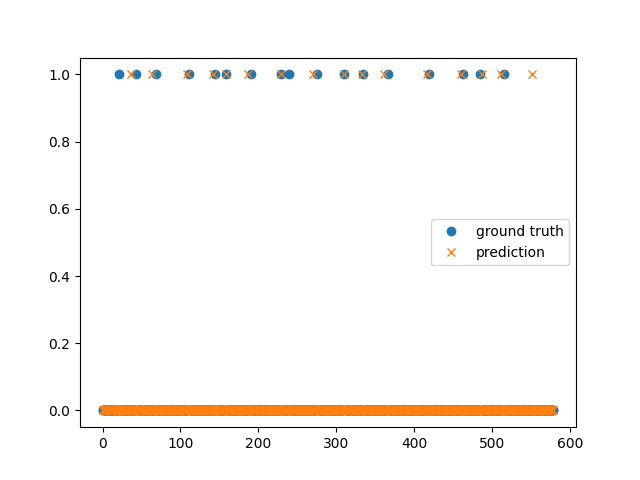

In [21]:

plot_shot_differences(Path("/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match10/shot/1_03_01_hit.csv"))